Crea i singoli file json che vengono poi letti da Gretel  
-> RUN IN EEG_3 ENVIRONMENT

In [4]:
from EEG_utils.EEG_utils import *

In [5]:
root_folder = "C:\\Users\\zanno\\physionet.org\\files\\chbmit\\1.0.0\\"
patient_id = "chb06"
record_id = "01"

Extracting data...
Extracting EDF parameters from C:\Users\zanno\physionet.org\files\chbmit\1.0.0\chb06\chb06_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils.py:154: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


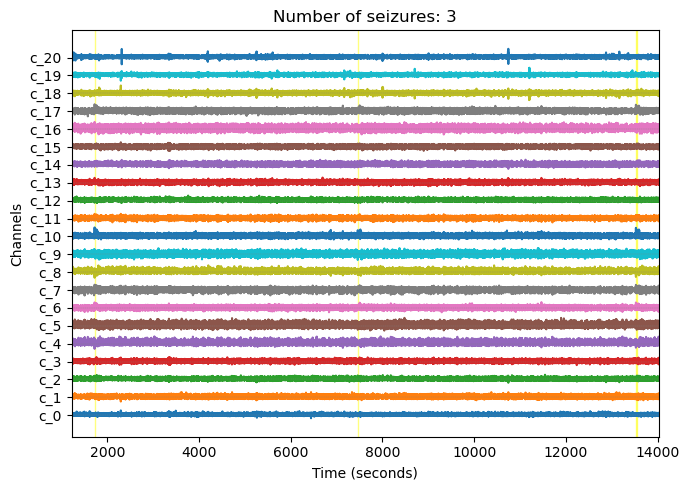

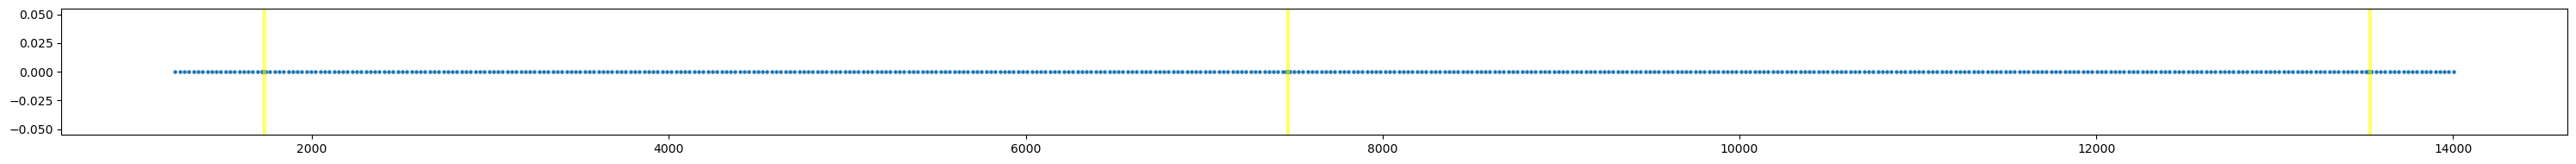

Creating graphs...
k: 2560 ---> t: 1234.0 (seizure class: 0)
k: 9104 ---> t: 1259.5625 (seizure class: 0)
k: 15648 ---> t: 1285.125 (seizure class: 0)
k: 22192 ---> t: 1310.6875 (seizure class: 0)
k: 28736 ---> t: 1336.25 (seizure class: 0)
k: 35280 ---> t: 1361.8125 (seizure class: 0)
k: 41824 ---> t: 1387.375 (seizure class: 0)
k: 48368 ---> t: 1412.9375 (seizure class: 0)
k: 54912 ---> t: 1438.5 (seizure class: 0)
k: 61456 ---> t: 1464.0625 (seizure class: 0)
k: 68000 ---> t: 1489.625 (seizure class: 0)
k: 74544 ---> t: 1515.1875 (seizure class: 0)
k: 81088 ---> t: 1540.75 (seizure class: 0)
k: 87632 ---> t: 1566.3125 (seizure class: 0)
k: 94176 ---> t: 1591.875 (seizure class: 0)
k: 100720 ---> t: 1617.4375 (seizure class: 0)
k: 107264 ---> t: 1643.0 (seizure class: 0)
k: 113808 ---> t: 1668.5625 (seizure class: 0)
k: 120352 ---> t: 1694.125 (seizure class: 0)
k: 126896 ---> t: 1719.6875 (seizure class: 0)
k: 128358 ---> t: 1725.3984375 (seizure class: 1)
k: 128376 ---> t: 1725.468

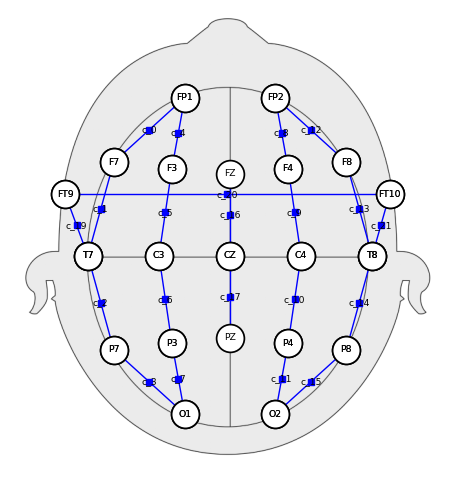

In [6]:
# Create patient
patient = Patient(FilePatient(root_folder, patient_id, record_id), num_points=500)

# Extract data
print('Extracting data...')
patient.extract_seizure_info()      # Extracting seizure information
patient.load_data()                 # Loading EEG data
patient.plot_signals()              # Plotting the signals with seizures highlighted

# Compute indices
patient.compute_indices()           # Performing sliding window correlation
patient.plot_indices()              # I can also do patient.plot_indices(xlim=(600,900))

# Create graph
print('Creating graphs...')
export_data_to_GRETEL(patient)      # Create graphs for GRETEL

print('Calculating nodes\' coordinates...')
export_coordinates(patient)         # Export coordinates

# __________________________________________________________________________

In [7]:
import datetime

now = datetime.datetime.now()
print("Ultima esecuzione completa:", now.strftime("%d/%m/%Y, ore %H:%M"))

Ultima esecuzione completa: 06/03/2025, ore 14:11
